# Stat542: Linear Regression (II)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm

## Prepare the Boston Housing Data

In [2]:
%cd ~/Desktop/STAT542_Liang
Boston = pd.read_csv("Data/Boston_Data.csv") 
myData = Boston[list(Boston.columns.values)]
myData.columns.values[13] = 'Y'
iLog = ['crim', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'Y']
for i in iLog:
    myData[i] = np.log(myData[i])
myData['zn'] = myData['zn']/10
myData['age'] = np.power(myData['age'], 2.5) / 10000
myData['ptratio'] = np.exp(0.4 * myData['ptratio'])/1000
myData['black'] = myData['black']/100
myData['lstat'] = np.sqrt(myData['lstat'])

/Users/feng_macpro/Desktop/STAT542_Liang


## Training Error vs Test Error

For linear regression models, when we add more and more variables, the training error (e.g., RSS or MSE) is always decreasing, but the test error (prediction error on an independent test data) is not necessary decreasing.

In [3]:
# Divide myData into training and test

n, p = myData.shape
p_range = np.arange(p)
p_range = p_range[1:]
np.random.seed(20)

from sklearn.model_selection import train_test_split

mytrain_size = 0.6
train_MSE = []
test_MSE =[]

xTrain, xTest, yTrain, yTest = train_test_split(myData.iloc[:, :-1], \
                                                    myData['Y'], \
                                                    train_size = mytrain_size)
for i in p_range:
    myfit = lm()
    myfit.fit(xTrain.iloc[:, :i], yTrain)
    train_Y_pred = myfit.predict(xTrain.iloc[:, :i])
    train_MSE.append(np.mean((yTrain - train_Y_pred)**2))
    
    test_Y_pred = myfit.predict(xTest.iloc[:, :i])
    test_MSE.append(np.mean((yTest - test_Y_pred)**2))

/Users/feng_macpro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


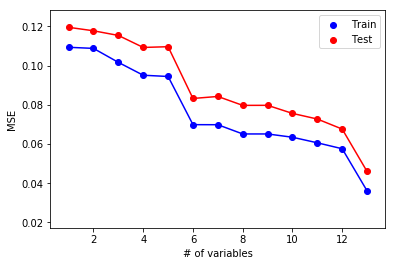

In [4]:
plt.scatter(p_range, train_MSE, c = "blue", label="Train")
plt.plot(p_range, train_MSE, c = "blue")
plt.scatter(p_range, test_MSE, c = "red", label="Test")
plt.plot(p_range, test_MSE, c = "red")
plt.xlabel('# of variables')
plt.ylabel('MSE')
plt.legend()
plt.show()

You can remove `np.random.seed(2)` and run the code above multiple time. In most cases, the blue line is below the red line (i.e., training error is better than test error), but sometimes, the red line could be below the blue line (i.e., test error is even better than the training error). In each iteration, you would see the blue line is always monotonically decreasing, but red line is not necessarily decreasing. Check the differences between the adjacent terms, which should be always negative for the blue line, but could have some positive terms for the red line.

In [5]:
np.vstack((np.diff(test_MSE), np.diff(train_MSE))).transpose()

array([[-1.76742031e-03, -5.63794245e-04],
       [-2.37237145e-03, -7.12489515e-03],
       [-6.12456483e-03, -6.57009685e-03],
       [ 3.76499048e-04, -6.34006606e-04],
       [-2.64092246e-02, -2.45785419e-02],
       [ 1.02841741e-03, -3.11215802e-05],
       [-4.55147305e-03, -4.71041358e-03],
       [ 2.73787879e-05, -6.75821229e-07],
       [-4.12064868e-03, -1.67715815e-03],
       [-2.87467776e-03, -2.83835443e-03],
       [-5.12902716e-03, -3.03260936e-03],
       [-2.16327221e-02, -2.14872837e-02]])

## Understand the LS Coefficient

How to interprete LS coefficients? For example, the coefficient for variable “rm” measures the average change of Y per room, with all other predictors held fixed.

Note that the result from SLR (regression with just one non-intercept predictor) might be different from the one from MLR. SLR suggests that “age” has a significant negative effect on housing price, while MLR suggests the opposite.

Such seemingly contradictory statements are caused by correlations among predictors. In this case, “age” has strong positive correlation with “crim” and “lsat”, two predictors with negative effect on Y; So in the joint model, the coefficient with “age” turns out to be positive, to correct the negative contribution that has already been introduced to the mdoel through the other two predictors.

In [6]:
import statsmodels.formula.api as smf
tmpfit = smf.ols(formula = "Y ~ age", data = myData).fit()
tmpfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           8.25e-31
Time:                        01:59:54   Log-Likelihood:                -197.88
No. Observations:                 506   AIC:                             399.8
Df Residuals:                     504   BIC:                             408.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3141      0.028    119.720      0.000       3.260       3.369
age           -0.0553      0.004    -12.353      0.000      -0.064      -0.046
==============================================================================
Omnibus:                       32.632   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.504
Skew:                           0.354   Prob(JB):                     2.97e-16
Kurtosis:                       4.700   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
all_covariates = list(myData.columns)
all_covariates.remove('Y')
my_formula = "Y ~ " + "+".join(all_covariates)
lmfit2 = smf.ols(formula = my_formula, data = myData).fit()
lmfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     123.2
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          2.33e-145
Time:                        01:59:54   Log-Likelihood:                 101.59
No. Observations:                 506   AIC:                            -175.2
Df Residuals:                     492   BIC:                            -116.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1769      0.379     11.020      0.000       3.432       4.922
crim          -0.0146      0.012     -1.254      0.211      -0.037       0.008
zn             0.0014      0.006      0.247      0.805      -0.010       0.012
indus         -0.0127      0.022     -0.570      0.569      -0.057       0.031
chas           0.1100      0.037      3.002      0.003       0.038       0.182
nox           -0.2831      0.105     -2.688      0.007      -0.490      -0.076
rm             0.4211      0.110      3.822      0.000       0.205       0.638
age            0.0064      0.005      1.317      0.189      -0.003       0.016
dis           -0.1832      0.037     -4.977      0.000      -0.255      -0.111
rad            0.0684      0.022      3.042      0.002       0.024       0.113
tax           -0.2018      0.048     -4.167      0.000      -0.297      -0.107
ptratio       -0.0400      0.008     -4.946      0.000      -0.056      -0.024
black          0.0445      0.011      3.882      0.000       0.022       0.067
lstat         -0.2626      0.016    -16.320      0.000      -0.294      -0.231
==============================================================================
Omnibus:                       50.620   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.340
Skew:                          -0.257   Prob(JB):                     6.47e-53
Kurtosis:                       6.337   Cond. No.                         458.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
np.round(myData.corr(), decimals = 2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Y
crim,1.00,-0.52,0.74,0.03,0.81,-0.32,0.70,-0.74,0.84,0.81,0.45,-0.48,0.62,-0.57
zn,-0.52,1.00,-0.66,-0.04,-0.57,0.31,-0.53,0.59,-0.35,-0.31,-0.35,0.18,-0.45,0.36
indus,0.74,-0.66,1.00,0.08,0.75,-0.43,0.66,-0.73,0.58,0.66,0.45,-0.33,0.62,-0.55
chas,0.03,-0.04,0.08,1.00,0.08,0.08,0.07,-0.09,0.01,-0.04,-0.13,0.05,-0.06,0.16
nox,0.81,-0.57,0.75,0.08,1.00,-0.32,0.78,-0.86,0.61,0.67,0.34,-0.38,0.61,-0.52
rm,-0.32,0.31,-0.43,0.08,-0.32,1.00,-0.28,0.28,-0.21,-0.31,-0.32,0.13,-0.64,0.61
age,0.70,-0.53,0.66,0.07,0.78,-0.28,1.00,-0.80,0.47,0.54,0.38,-0.29,0.64,-0.48
dis,-0.74,0.59,-0.73,-0.09,-0.86,0.28,-0.80,1.00,-0.54,-0.60,-0.32,0.32,-0.56,0.41
rad,0.84,-0.35,0.58,0.01,0.61,-0.21,0.47,-0.54,1.00,0.82,0.40,-0.41,0.46,-0.43
tax,0.81,-0.31,0.66,-0.04,0.67,-0.31,0.54,-0.60,0.82,1.00,0.48,-0.43,0.53,-0.56


## F-test

Test a single predictor (in this case, F-test = t-test).

In [9]:
X = myData.iloc[:, :-1]
Y = myData['Y']
lmfit1 = lm()
lmfit1.fit(X, myData['Y'])

X0 = X.drop(['age'], axis=1)
lmfit0 = lm()
lmfit0.fit(X0, Y)

RSS0 = lmfit0.score(X0, Y)
RSS1 = lmfit1.score(X, Y)

In [10]:
import scipy.stats as stats
f_value = (RSS1 - RSS0)/((1 - RSS1)/(506 - 14))
print(f_value, np.sqrt(f_value))  # F-stat and t-stat for age

1.733824280945283 1.3167476147482793


In [11]:
1 - stats.f.cdf(f_value, 1, 506-14) # p-value for F-test for age

0.18853624114652479

In [12]:
2*(1 - stats.t.cdf(np.sqrt(f_value), 506-14))  # p-value for T-test for age

0.18853624114646994

In [13]:
lmfit2.summary2().tables[1].loc['age',:] # compare the T-stat and p-value for age from lmfit2

Coef.       0.006403
Std.Err.    0.004863
t           1.316748
P>|t|       0.188536
[0.025     -0.003151
0.975]      0.015958
Name: age, dtype: float64

## Collinearity

Check the Car Seat Position Data.

Car drivers like to adjust the seat position for their own comfort. Car designers would find it helpful to know how different drivers will position the seat depending on their size and age. Researchers at the HuMoSim laboratory at the University of Michigan collected data on 38 drivers.

* Age:
* Weight:
* HtShoes: height with shoes in cm
* Ht: height without shoes in cm
* Seated: seated height in cm
* Arm: lower arm length in cm
* Thigh: thigh length in cm
* Leg: lower leg length in cm
* hipcenter: horizontal distance of the midpoint of the hips from a fixed location in the car in mm

The researchers were interested in determining if a relationship exists between hipcenter and the other variables. Due to the high correlations among the predictors, we see high R-square, significant overall F-test, but no individual variables are significant.

In [14]:
%cd ~/Desktop/STAT542_Liang/
seatpos = pd.read_csv("Data/SeatPos.csv") 

/Users/feng_macpro/Desktop/STAT542_Liang


In [15]:
seatpos.shape

(38, 9)

In [16]:
seatpos.head()

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
0,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
1,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
2,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
3,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
4,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230


In [ ]:
sns.pairplot(seatpos)

In [18]:
all_covariates = list(seatpos.columns)
all_covariates.remove('hipcenter')
my_formula = "hipcenter ~ " + "+".join(all_covariates)
tmpfit = smf.ols(formula = my_formula, data = seatpos).fit()
tmpfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              hipcenter   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     7.940
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.31e-05
Time:                        02:00:00   Log-Likelihood:                -186.73
No. Observations:                  38   AIC:                             391.5
Df Residuals:                      29   BIC:                             406.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    436.4321    166.572      2.620      0.014      95.755     777.109
Age            0.7757      0.570      1.360      0.184      -0.391       1.942
Weight         0.0263      0.331      0.080      0.937      -0.651       0.703
HtShoes       -2.6924      9.753     -0.276      0.784     -22.640      17.255
Ht             0.6013     10.130      0.059      0.953     -20.117      21.319
Seated         0.5338      3.762      0.142      0.888      -7.160       8.228
Arm           -1.3281      3.900     -0.341      0.736      -9.305       6.649
Thigh         -1.1431      2.660     -0.430      0.671      -6.583       4.297
Leg           -6.4390      4.714     -1.366      0.182     -16.080       3.202
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.664
Skew:                           0.157   Prob(JB):                        0.717
Kurtosis:                       2.434   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
np.round(seatpos.corr(), decimals = 2)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
Age,1.00,0.08,-0.08,-0.09,-0.17,0.36,0.09,-0.04,0.21
Weight,0.08,1.00,0.83,0.83,0.78,0.70,0.57,0.78,-0.64
HtShoes,-0.08,0.83,1.00,1.00,0.93,0.75,0.72,0.91,-0.80
Ht,-0.09,0.83,1.00,1.00,0.93,0.75,0.73,0.91,-0.80
Seated,-0.17,0.78,0.93,0.93,1.00,0.63,0.61,0.81,-0.73
Arm,0.36,0.70,0.75,0.75,0.63,1.00,0.67,0.75,-0.59
Thigh,0.09,0.57,0.72,0.73,0.61,0.67,1.00,0.65,-0.59
Leg,-0.04,0.78,0.91,0.91,0.81,0.75,0.65,1.00,-0.79
hipcenter,0.21,-0.64,-0.80,-0.80,-0.73,-0.59,-0.59,-0.79,1.00


In [20]:
tmpfit = smf.ols('hipcenter ~ Age + Weight + Ht + Seated', data = seatpos).fit()
tmpfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              hipcenter   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     16.01
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.22e-07
Time:                        02:00:00   Log-Likelihood:                -188.28
No. Observations:                  38   AIC:                             386.6
Df Residuals:                      33   BIC:                             394.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    478.6589    159.734      2.997      0.005     153.678     803.639
Age            0.5840      0.426      1.372      0.179      -0.282       1.450
Weight        -0.0154      0.316     -0.049      0.962      -0.659       0.628
Ht            -4.9902      1.644     -3.036      0.005      -8.335      -1.646
Seated         2.0463      3.413      0.600      0.553      -4.897       8.990
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.435
Skew:                          -0.244   Prob(JB):                        0.805
Kurtosis:                       2.810   Cond. No.                     6.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
tmpfit = smf.ols('hipcenter ~ Ht', data = seatpos).fit()
tmpfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              hipcenter   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     63.53
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.83e-09
Time:                        02:00:00   Log-Likelihood:                -189.45
No. Observations:                  38   AIC:                             382.9
Df Residuals:                      36   BIC:                             386.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    556.2553     90.670      6.135      0.000     372.367     740.144
Ht            -4.2650      0.535     -7.970      0.000      -5.350      -3.180
==============================================================================
Omnibus:                        1.707   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.028
Skew:                          -0.395   Prob(JB):                        0.598
Kurtosis:                       3.154   Cond. No.                     2.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""